In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Description

#### Abalone Case Study
##### Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

##### Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

###### Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

## Import dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Bhushan0130/Datasets/main/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.sample(4) 

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1815,F,0.665,0.515,0.185,1.3405,0.5595,0.2930,0.4375,11
3191,M,0.650,0.515,0.180,1.3315,0.5665,0.3470,0.4050,13
3792,F,0.655,0.520,0.175,1.4720,0.6275,0.2700,0.4500,13
3983,F,0.585,0.450,0.125,0.8740,0.3545,0.2075,0.2250,6


In [4]:
df.tail(4)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [5]:
df.columns   

# ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
#        'Viscera weight', 'Shell weight', 'Rings']

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

## Encoding 

### Using get_dummies

In [6]:
df.Sex.unique() 

# ['M', 'F', 'I']

array(['M', 'F', 'I'], dtype=object)

In [7]:
dummies = pd.get_dummies(df.Sex)
df = pd.concat( [dummies, df ], axis = 1)
df.shape
df.head()

,F,I,M,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0,1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0,0,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0,1,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,1,0,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
df.drop(columns = ['Sex'], inplace = True)   # sex column deleted

## Adding new of AGE based on Rings column

In [9]:
df['Age'] = df['Rings'] + 1.5

In [10]:
df.head(2)

,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,16.5
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,8.5


In [11]:
df.shape 
(4177, 12)

(4177, 12)

In [12]:
df.dtypes

# F                   uint8
# I                   uint8
# M                   uint8
# Length            float64
# Diameter          float64
# Height            float64
# Whole weight      float64
# Shucked weight    float64
# Viscera weight    float64
# Shell weight      float64
# Rings               int64
# Age               float64

F                   uint8
I                   uint8
M                   uint8
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
Age               float64
dtype: object

In [13]:
df.info() 

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 4177 entries, 0 to 4176
# Data columns (total 12 columns):
#  #   Column          Non-Null Count  Dtype  
# ---  ------          --------------  -----  
#  0   F               4177 non-null   uint8  
#  1   I               4177 non-null   uint8  
#  2   M               4177 non-null   uint8  
#  3   Length          4177 non-null   float64
#  4   Diameter        4177 non-null   float64
#  5   Height          4177 non-null   float64
#  6   Whole weight    4177 non-null   float64
#  7   Shucked weight  4177 non-null   float64
#  8   Viscera weight  4177 non-null   float64
#  9   Shell weight    4177 non-null   float64
#  10  Rings           4177 non-null   int64  
#  11  Age             4177 non-null   float64
# dtypes: float64(8), int64(1), uint8(3)
# memory usage: 306.1 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   F               4177 non-null   uint8  
 1   I               4177 non-null   uint8  
 2   M               4177 non-null   uint8  
 3   Length          4177 non-null   float64
 4   Diameter        4177 non-null   float64
 5   Height          4177 non-null   float64
 6   Whole weight    4177 non-null   float64
 7   Shucked weight  4177 non-null   float64
 8   Viscera weight  4177 non-null   float64
 9   Shell weight    4177 non-null   float64
 10  Rings           4177 non-null   int64  
 11  Age             4177 non-null   float64
dtypes: float64(8), int64(1), uint8(3)
memory usage: 306.1 KB


<AxesSubplot:xlabel='Rings', ylabel='count'>

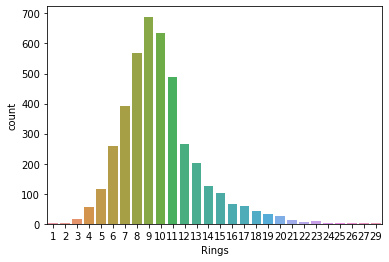

In [14]:
sns.countplot(df.Rings)  # just for information

In [15]:
float_col = df.select_dtypes(include = ['float']).keys()
cat_col = df.select_dtypes(include = ['int64']).keys()
print(float_col)
# ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
#        'Viscera weight', 'Shell weight', 'Age']

print(cat_col)
# 'Rings'

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')
Index(['Rings'], dtype='object')


## Null Value analysis

In [16]:
df.isnull().sum().sum()   # not null value present in the dataset

0

<AxesSubplot:>

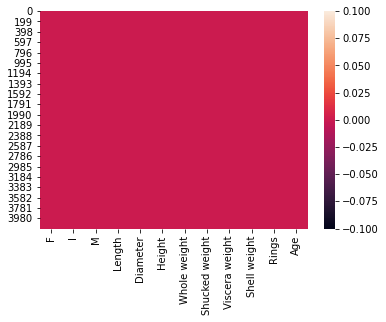

In [17]:
sns.heatmap(df.isnull())   # Heatmap for null value

## Outliers Analysis

In [18]:
df_columns = df.select_dtypes(include = ['float', 'int64'] ).keys()
df_columns

# ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
#        'Viscera weight', 'Shell weight', 'Rings', 'Age']

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Age'],
      dtype='object')

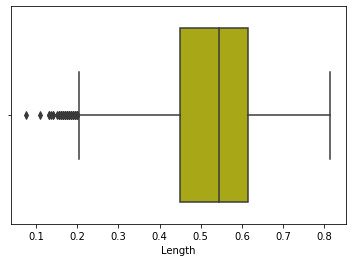

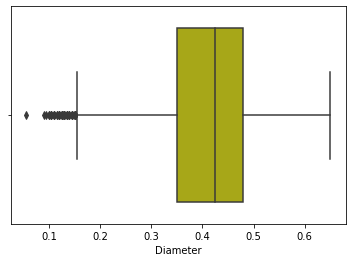

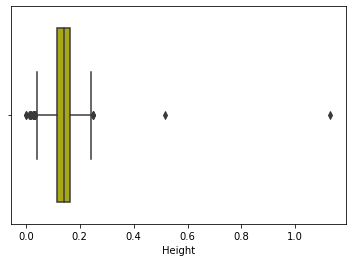

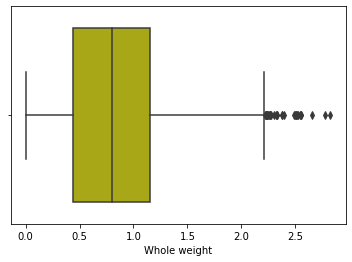

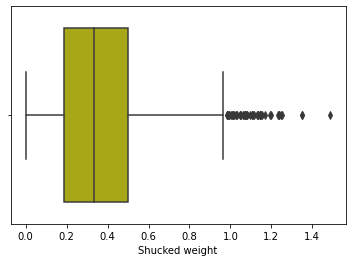

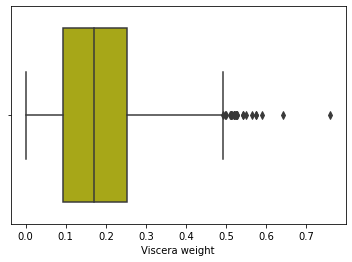

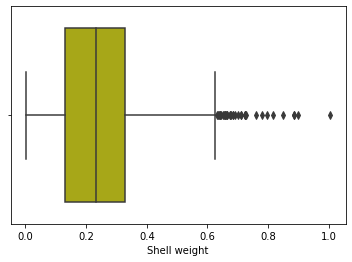

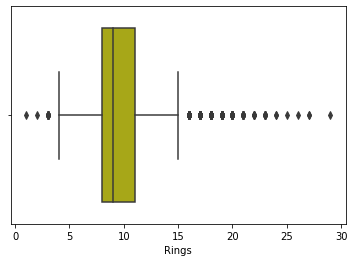

In [19]:
for i in df_columns[:-1]:
    plt.figure()
    sns.boxplot(df[i], color = 'y')
    print('\n')
    
    # every column is containg outliers

## Skewness analysis

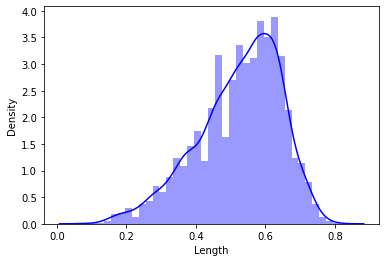

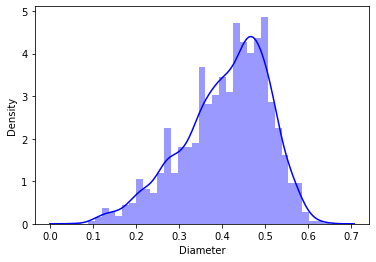

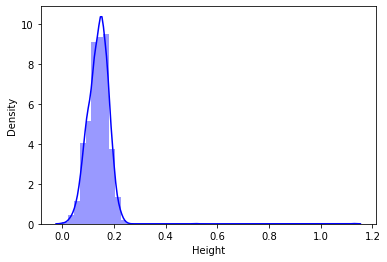

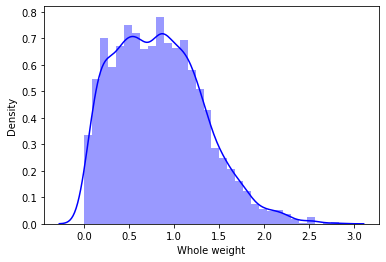

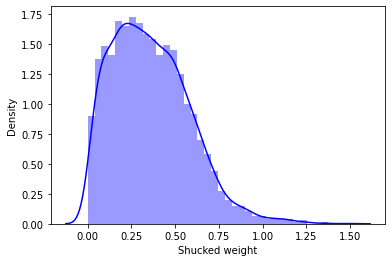

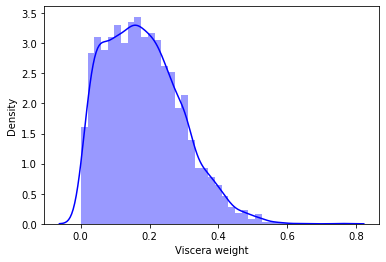

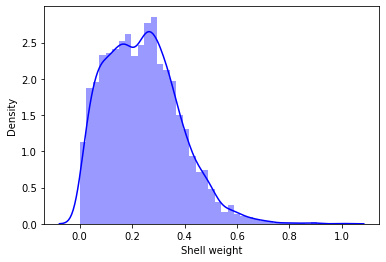

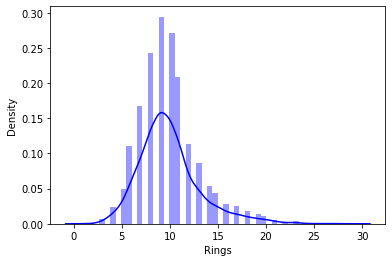

In [20]:
for i in df_columns[:-1]:
    plt.figure()
    sns.distplot(df[i], color = 'b')

In [21]:
# Length and Diameter is skewed columns
# other columns are little bit skewed

##  For cateogirlcal variable

In [22]:
df.Rings.value_counts()  # Different different classis found
# 1, 26, 23, 2 and 25 class are containing only 1 record 

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

<AxesSubplot:xlabel='Rings', ylabel='count'>

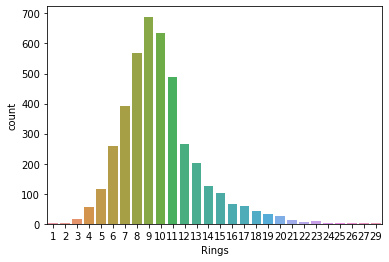

In [23]:
sns.countplot(df.Rings)   # Imbalancy is in rings column

## Checking the distribution of the continuous value of the float type columns

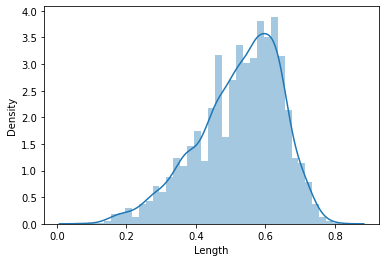

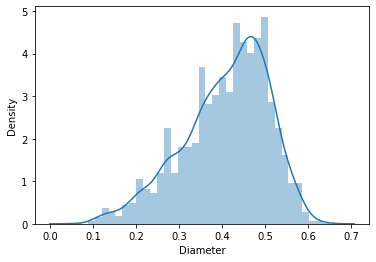

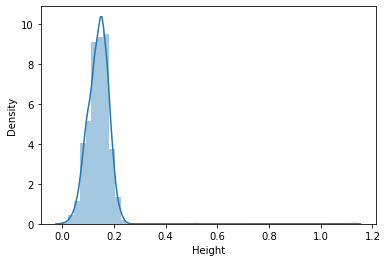

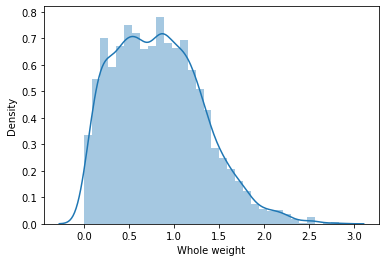

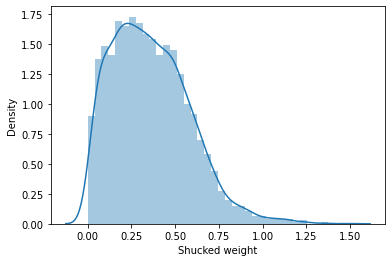

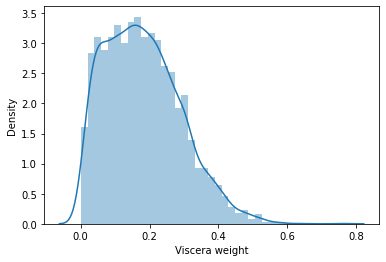

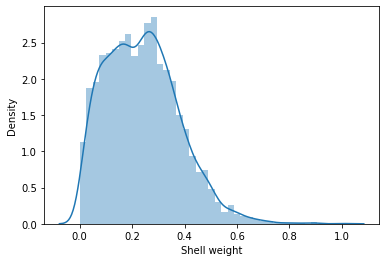

In [24]:
for i in float_col[:-1]:
    plt.figure()
    sns.distplot(df[i], kde = True)
    
    # maximum column are almost normally distribution except length column
    # length column is skewed 

## Checking the spread

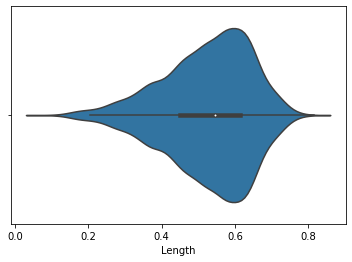

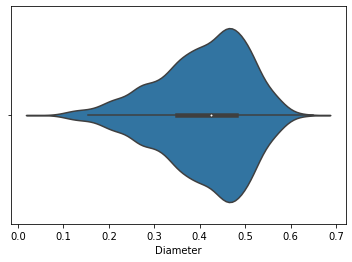

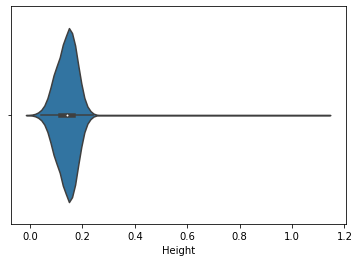

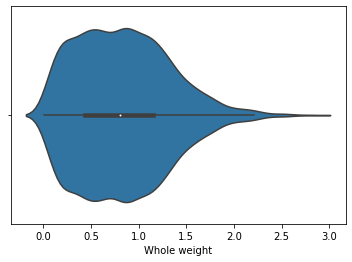

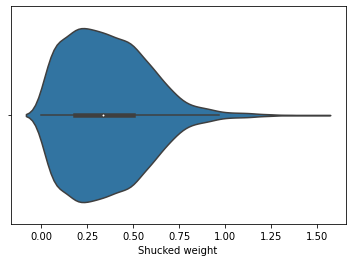

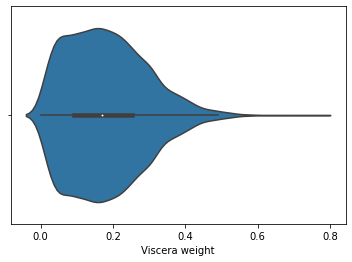

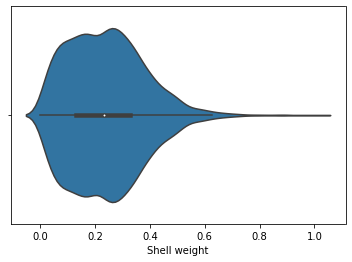

In [25]:
for i in float_col[:-1]:
    plt.figure()
    sns.violinplot(df[i], kde = True)
    
    # As we can observed every column is well spread , special whole weight column and shell weight

## Checking the pattern of the data, how they are connected with each other

#### Bivariate Analysis

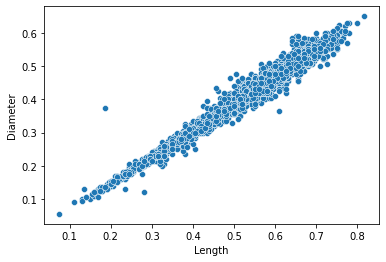

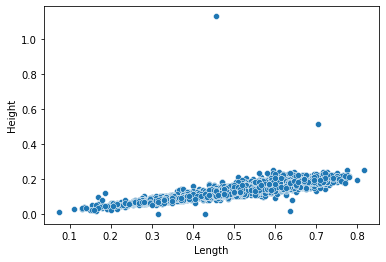

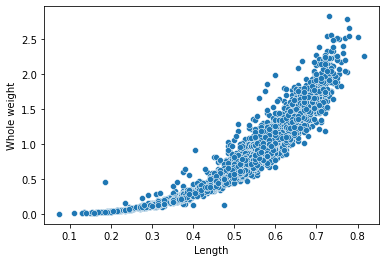

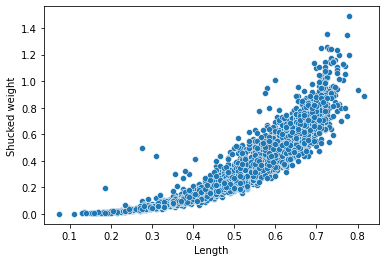

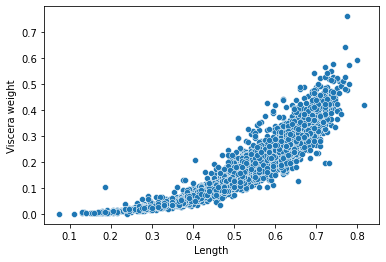

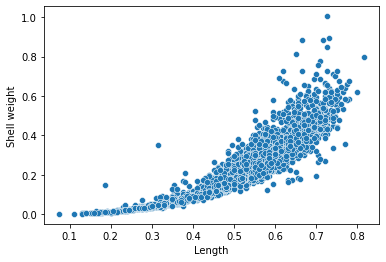

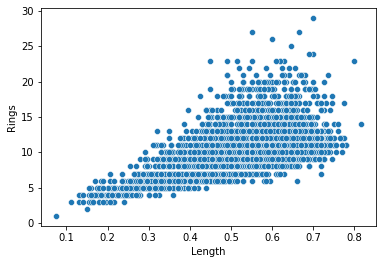

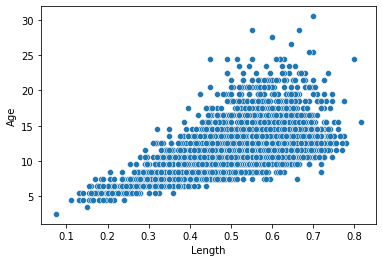

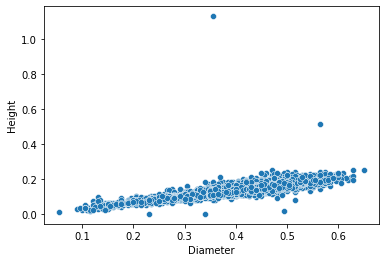

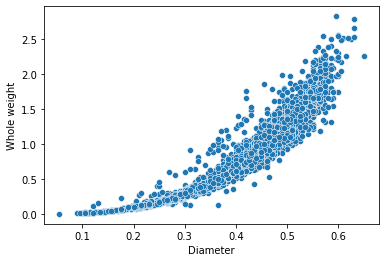

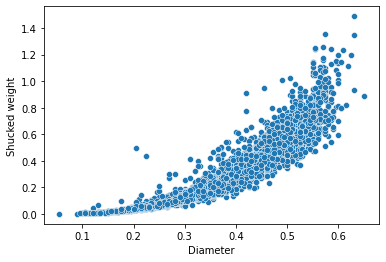

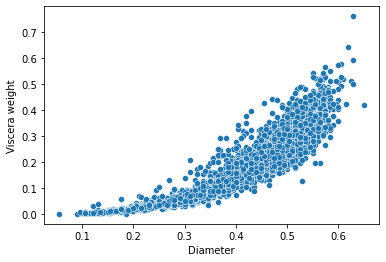

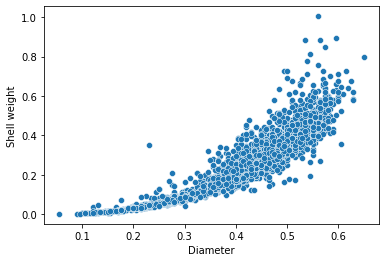

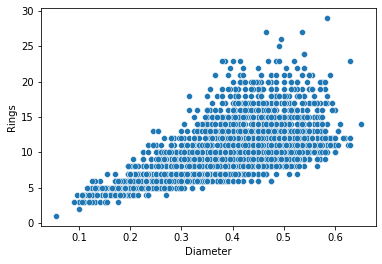

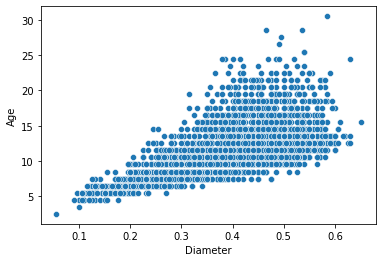

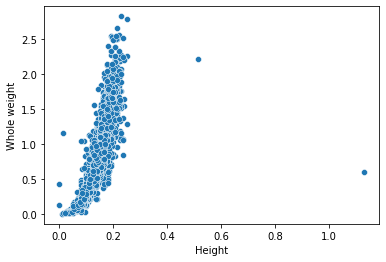

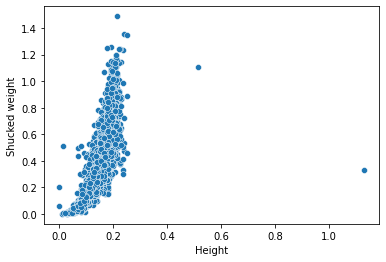

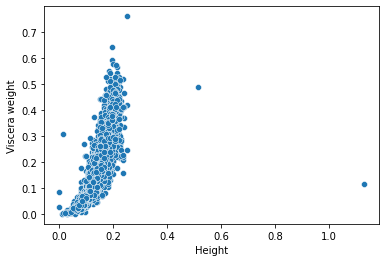

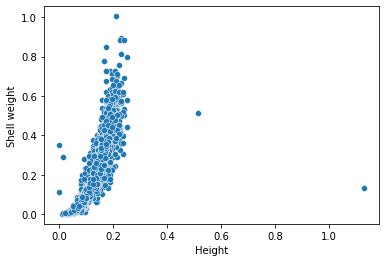

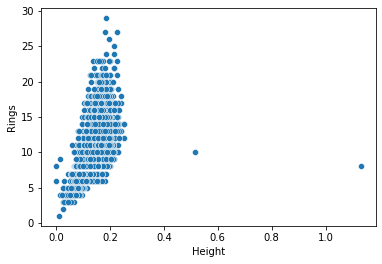

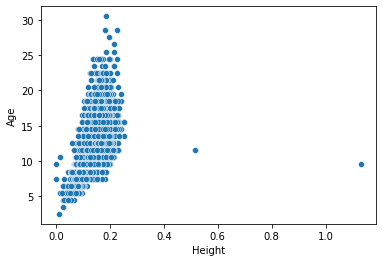

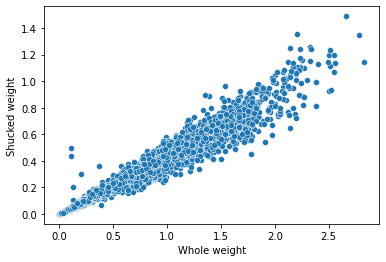

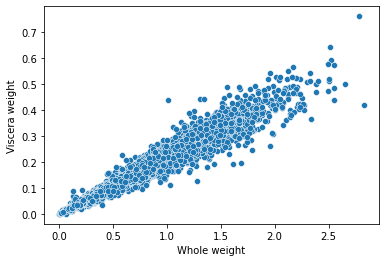

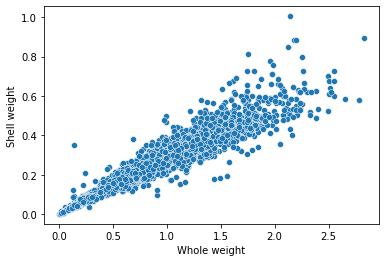

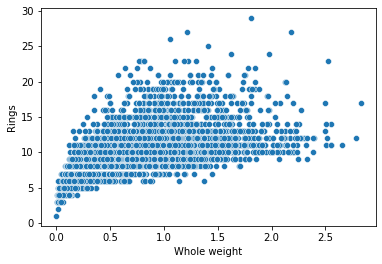

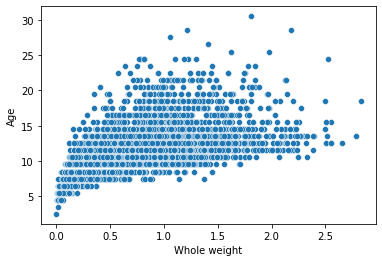

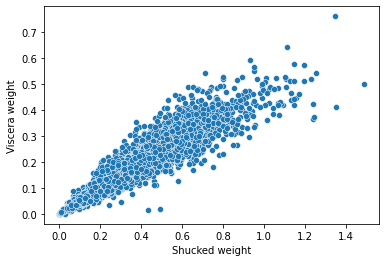

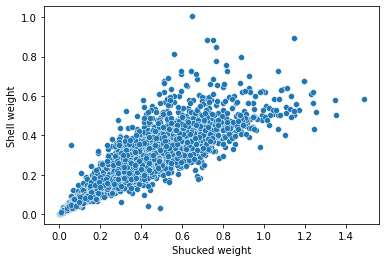

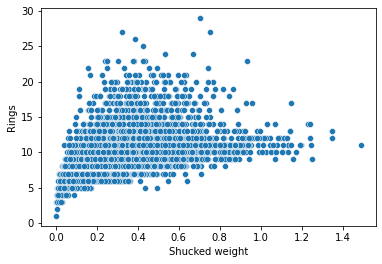

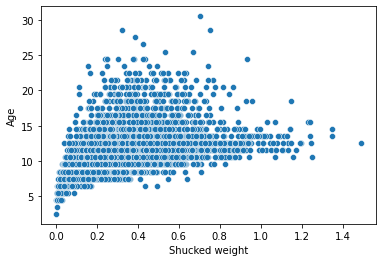

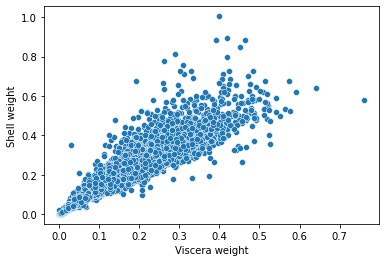

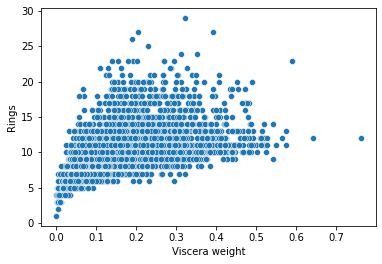

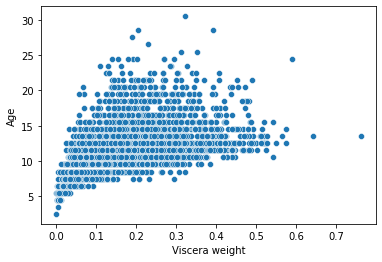

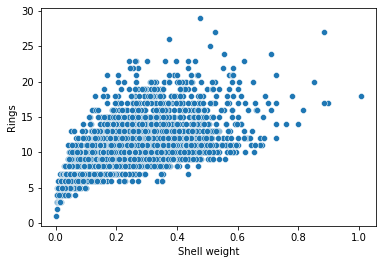

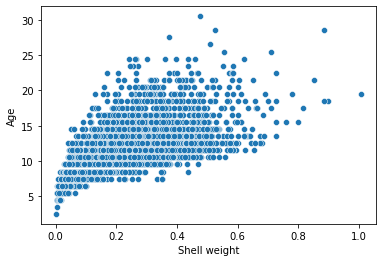

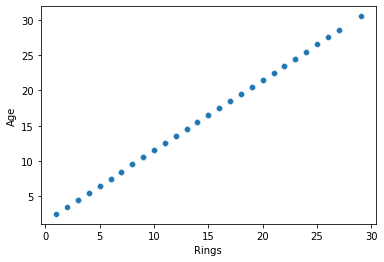

In [26]:
for i in range(len(df_columns)):

    for j in df_columns[i+1:]:    
        plt.figure()
        sns.scatterplot(df[df_columns[i]], df[j])


In [28]:
# for i in range(len(df_columns)):

#     for j in df_columns[i+1:]:    
#         plt.figure()
#         sns.stripplot(df[df_columns[i]], df[j])

# This cell will take time , and output as scatter plot only color difference will be here...

In [29]:
# for i in range(len(df_columns)):

#     for j in df_columns[i+1:]:    
#         plt.figure()
#         sns.swarmplot(df[df_columns[i]], df[j])
        
        # this jypyter cell will take time

In [30]:
# for i in range(len(df_columns)):

#     for j in df_columns[i+1:]:    
#         plt.figure()
#         plt.hexbin(x = df_columns[i], y = j,data = df)
        
          # this jypyter cell will take time

In [31]:
# maximum columns are showing linear pattern 
# lengh with rings are highly scattered
# lengh with age are also highly scattered
# Height with rings are highly scattered
# Height with age are also highly scattered

## Correlation

In [32]:
df.corr()

,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
F,1.000000,-0.464298,-0.512528,0.309666,0.318626,0.298421,0.299741,0.263991,0.308444,0.306319,0.250279,0.250279
I,-0.464298,1.000000,-0.522541,-0.551465,-0.564315,-0.518552,-0.557592,-0.521842,-0.556081,-0.546953,-0.436063,-0.436063
M,-0.512528,-0.522541,1.000000,0.236543,0.240376,0.215459,0.252038,0.251793,0.242194,0.235391,0.181831,0.181831
Length,0.309666,-0.551465,0.236543,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.556720
Diameter,0.318626,-0.564315,0.240376,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.574660
Height,0.298421,-0.518552,0.215459,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.557467
Whole weight,0.299741,-0.557592,0.252038,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.540390
Shucked weight,0.263991,-0.521842,0.251793,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.420884
Viscera weight,0.308444,-0.556081,0.242194,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.503819
Shell weight,0.306319,-0.546953,0.235391,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.627574


<AxesSubplot:>

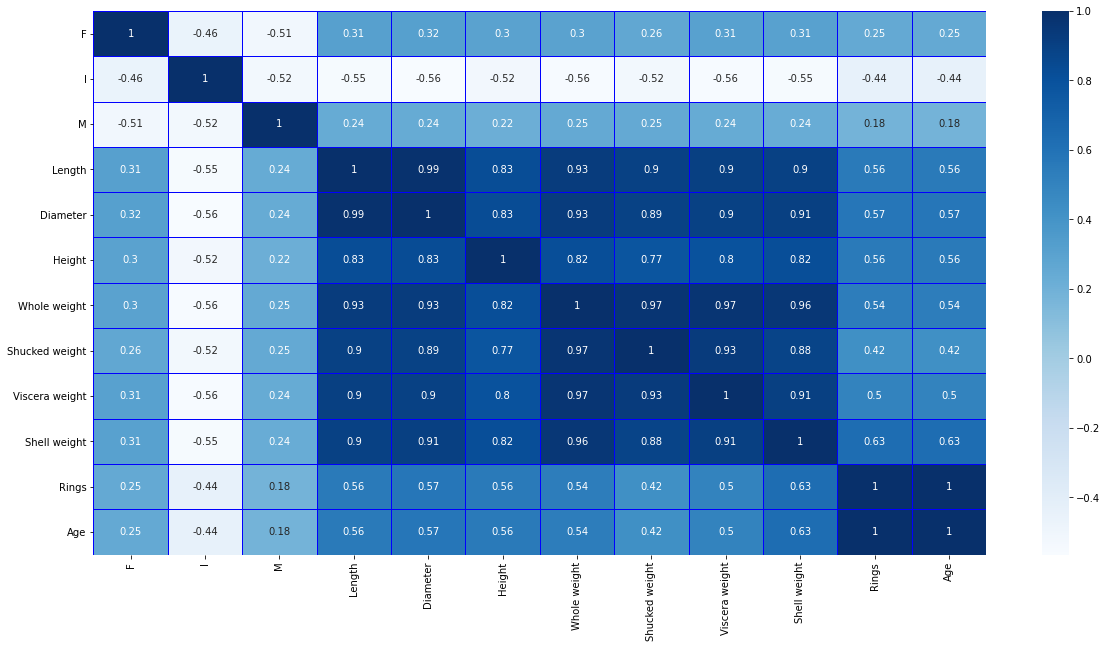

In [33]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', linewidth = 0.5, linecolor = 'blue'  )

## Describe data

In [34]:
df.describe()

,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.312904,0.321283,0.365813,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.463731,0.467025,0.481715,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.000000,0.000000,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.000000,0.000000,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.000000,0.000000,0.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,1.000000,1.000000,1.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,1.000000,1.000000,1.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


In [35]:
# 1.  in the length column mean is 0.5239 and 50 percentile is 0.54500 there is some difference means length is
# not normally distributed 

# 2. Every columns have some difference between mean and 50% percentile but differnce is not high
# hence we can say data is not highly non normal distribution 

<AxesSubplot:>

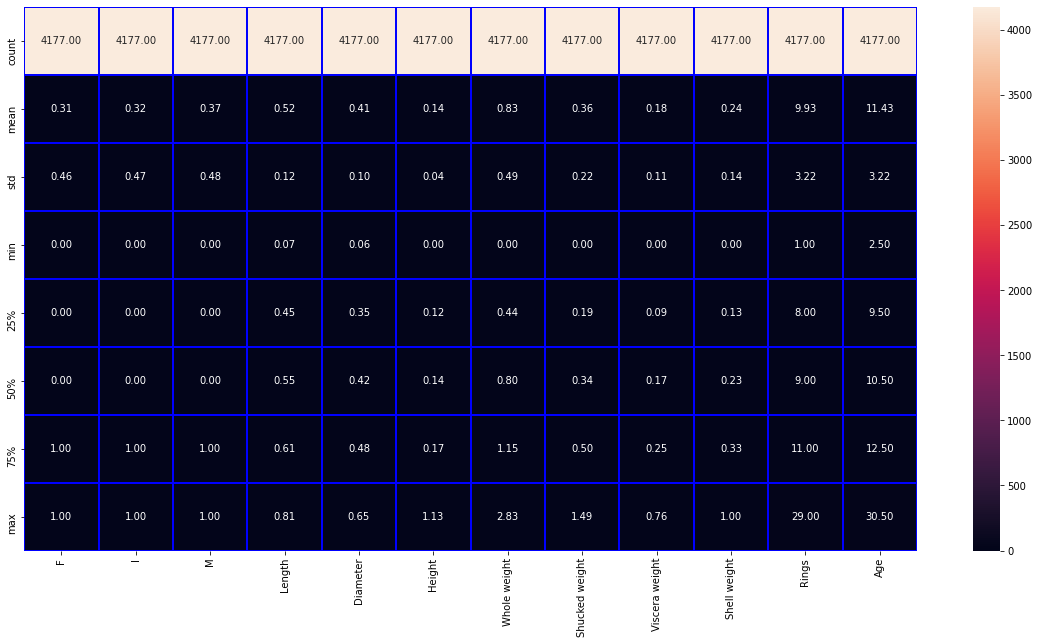

In [36]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.describe(), annot = True, linewidth = 0.05, linecolor = 'blue', fmt = "0.2f")

## Checking the columns which are positively and negatively correlated with the target columns

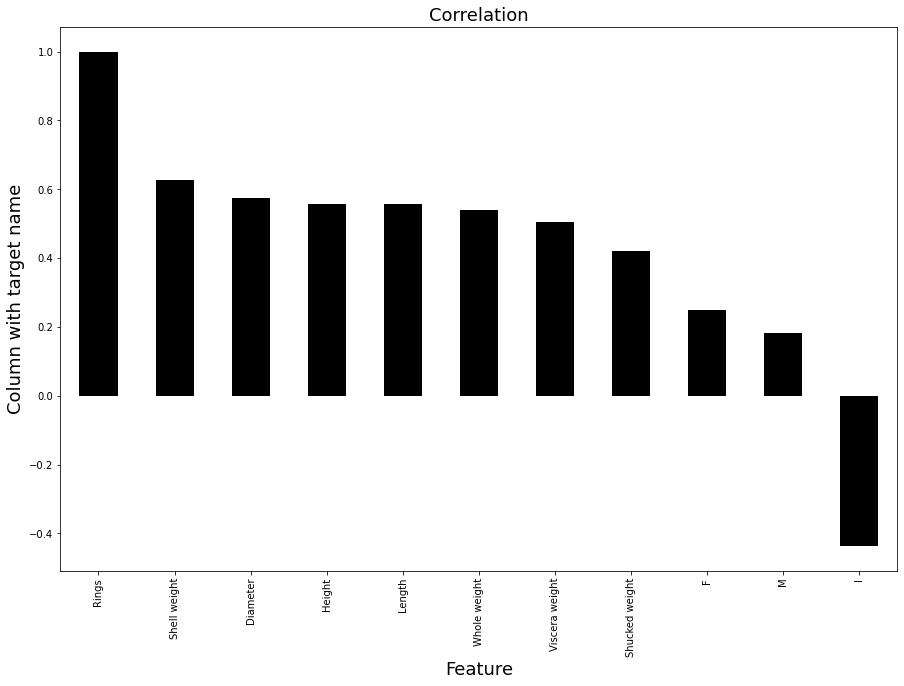

In [37]:
plt.figure(figsize = (15, 10))
df.corr()['Age'].sort_values(ascending = False).drop (['Age']).plot(kind = 'bar', color = 'black')
plt.xlabel('Feature', fontsize = 18)
plt.ylabel('Column with target name', fontsize = 18)
plt.title('Correlation', fontsize = 18)
plt.show()

In [38]:
All columns are contributing positively toward

SyntaxError: invalid syntax (Temp/ipykernel_6612/3616647821.py, line 1)

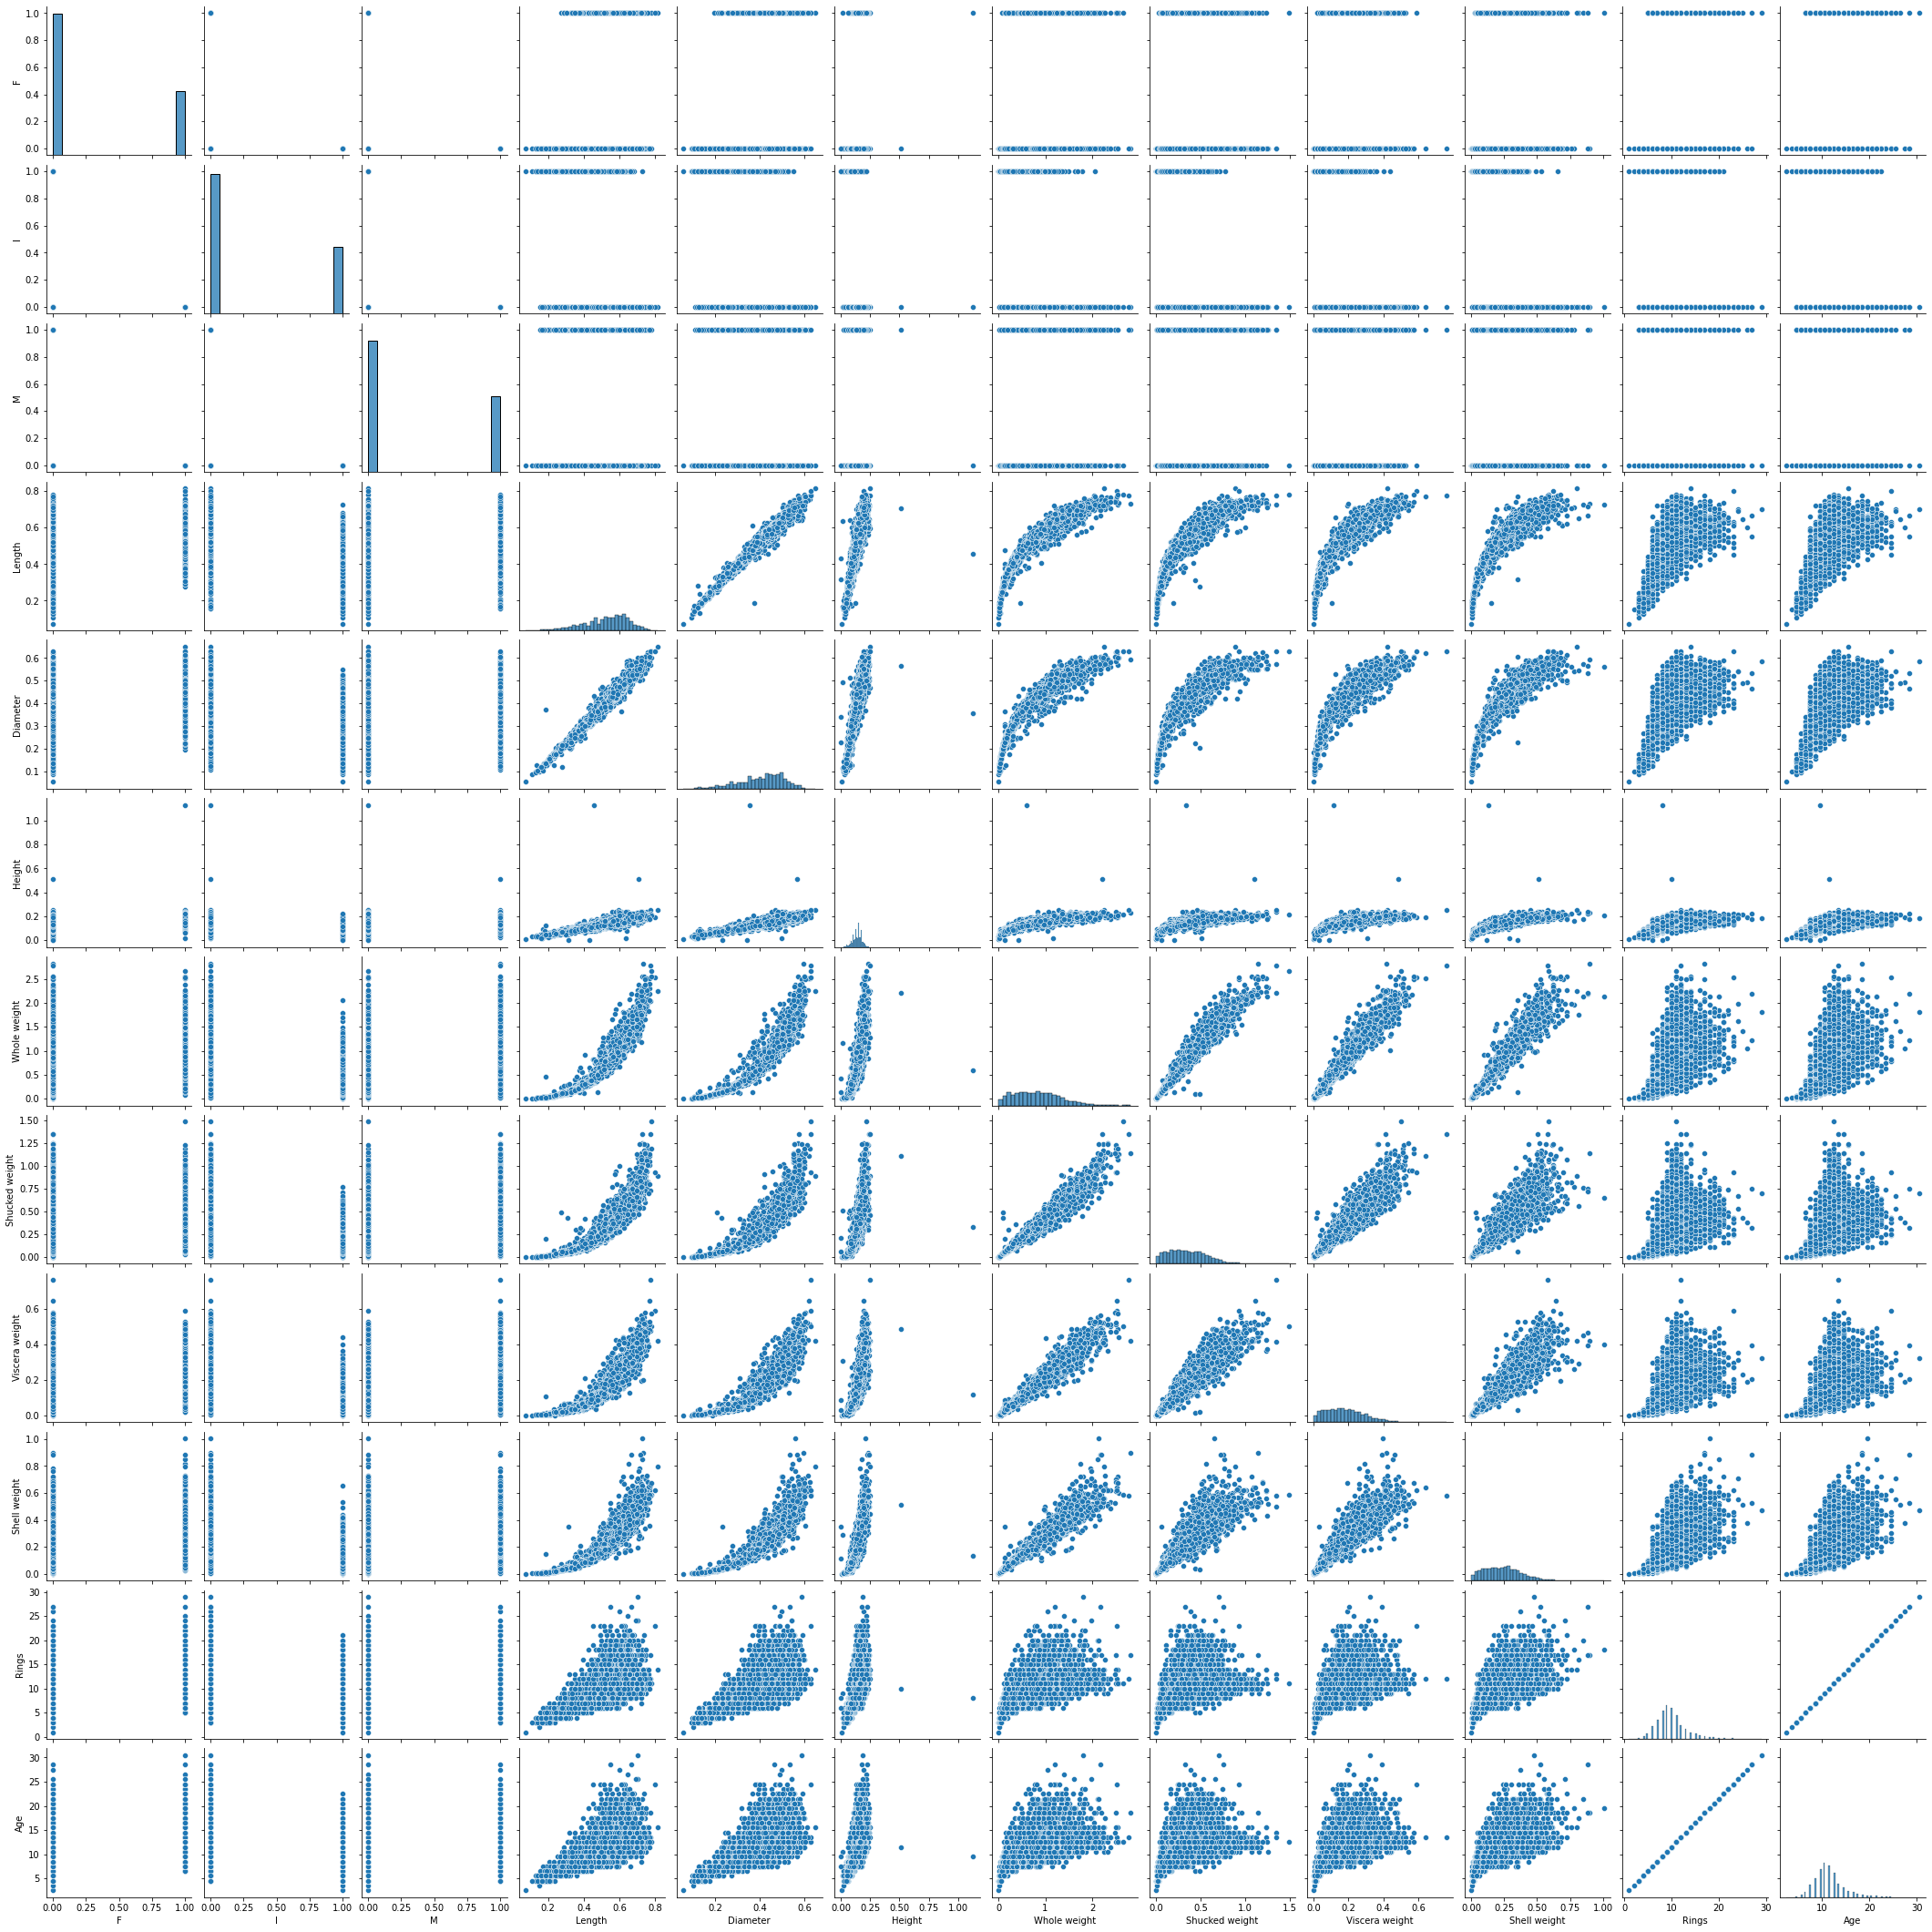

In [39]:
sns.pairplot(df)

## Removing Outliers

### zscore

In [40]:
from scipy.stats import zscore

In [41]:
z =  np.abs(zscore(df))
df_z = df[(z < 3).all(axis = 1)]
df_z.shape

(4027, 12)

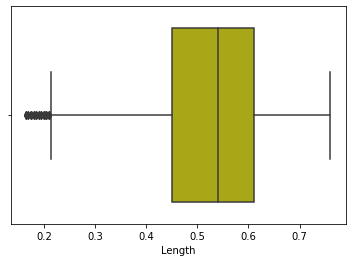

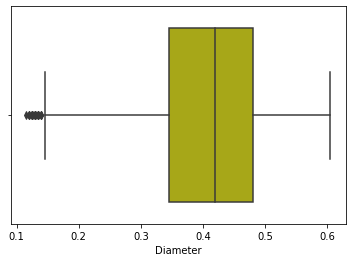

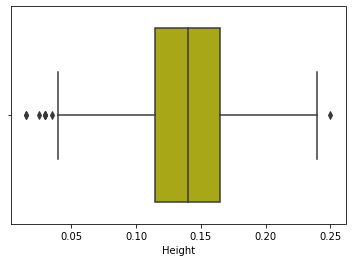

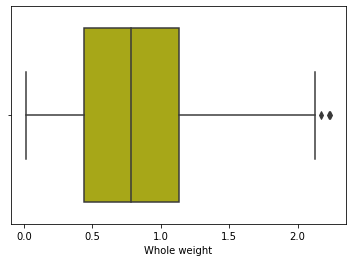

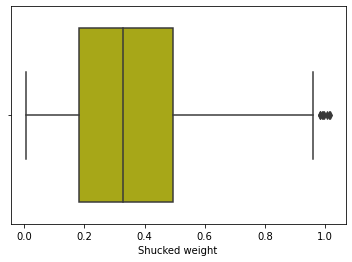

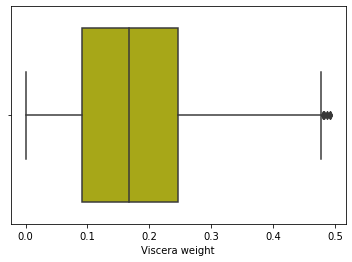

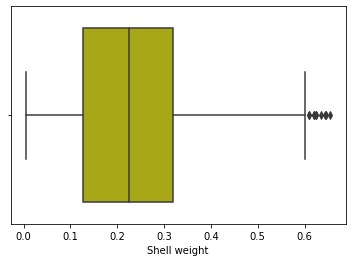

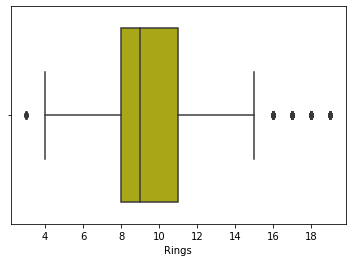

In [42]:
for i in df_columns[:-1]:
    plt.figure()
    sns.boxplot(df_z[i], color = 'y')

In [43]:
(df.shape[0] -  df_z.shape[0] ) / df.shape[0] * 100  
# Only 3.5 % data loss is occuring by using zscore

3.5910940866650707

### IQR

In [44]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [45]:
df_IQR = df[ ~( (df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR )) ).any(axis = 1) ]
df_IQR.shape

(3781, 12)

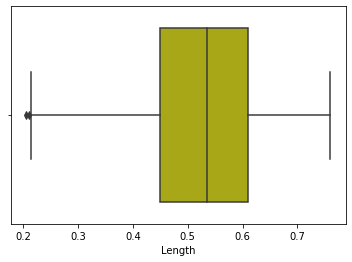

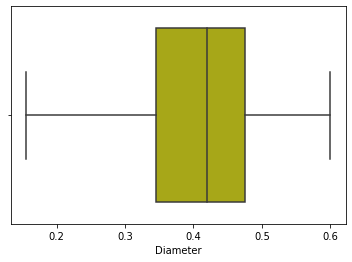

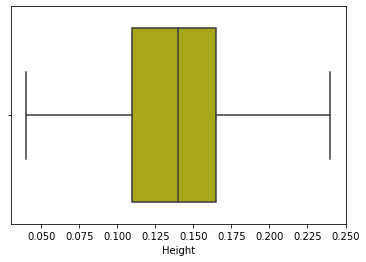

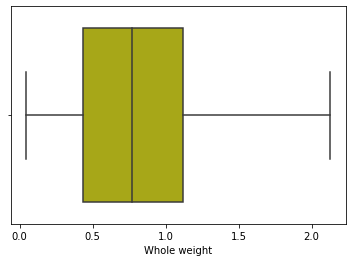

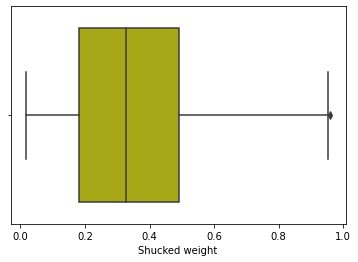

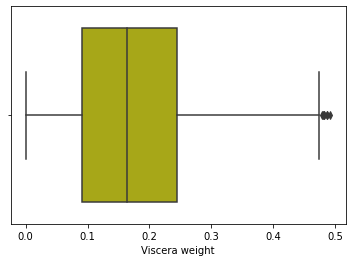

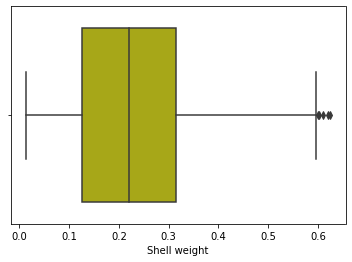

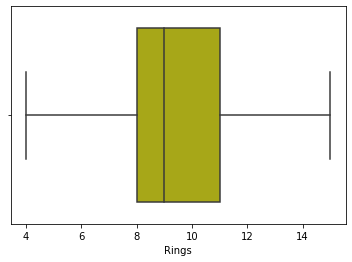

In [46]:
for i in df_columns[:-1]:
    plt.figure()
    sns.boxplot(df_IQR[i], color = 'y')

In [47]:
(df.shape[0] -  df_IQR.shape[0] ) / df.shape[0] * 100  
# Only 6.381922026322324 % data loss is occuring by using zscore

9.480488388795786

In [48]:
# Zscore is giving less data loss, so we will consider zscore for removing outliers

In [49]:
z =  np.abs(zscore(df))
df = df[(z < 3).all(axis = 1)]
df.shape

(4027, 12)

## Seperate dataset unto x and y

In [50]:
x = df.iloc[:,:-1]
y = df.iloc[:, -1]
print('shape of x', x.shape)
print('Shape of y', y.shape)

shape of x (4027, 11)
Shape of y (4027,)


## Removing Skewness

In [51]:
x.skew()

F                 0.821149
I                 0.731618
M                 0.576507
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

In [52]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer( 'yeo-johnson')

In [53]:
data = pt.fit_transform(x)
x = pd.DataFrame(data, columns = x.columns)

In [54]:
x.skew()

F                 0.821149
I                 0.731618
M                 0.576507
Length           -0.082985
Diameter         -0.080956
Height           -0.015962
Whole weight     -0.016797
Shucked weight    0.021815
Viscera weight    0.035902
Shell weight      0.016660
Rings             0.004745
dtype: float64

## Removing Multicolinearity

### Using VIF (Variance Inflation Factor)

In [55]:
from scipy import stats

<AxesSubplot:>

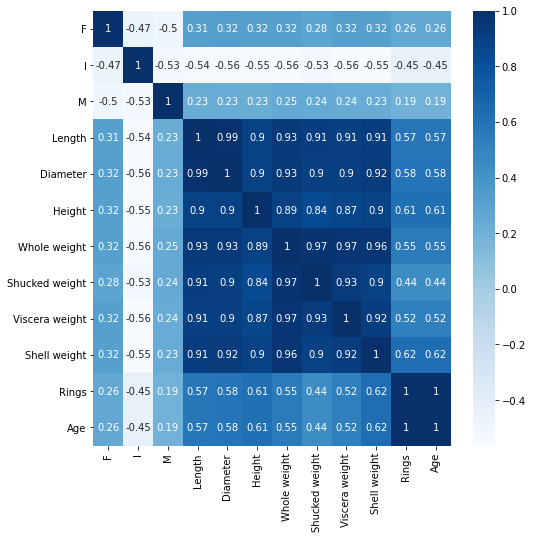

In [56]:
plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')  # for reference only and this heatmap already explained above

<AxesSubplot:>

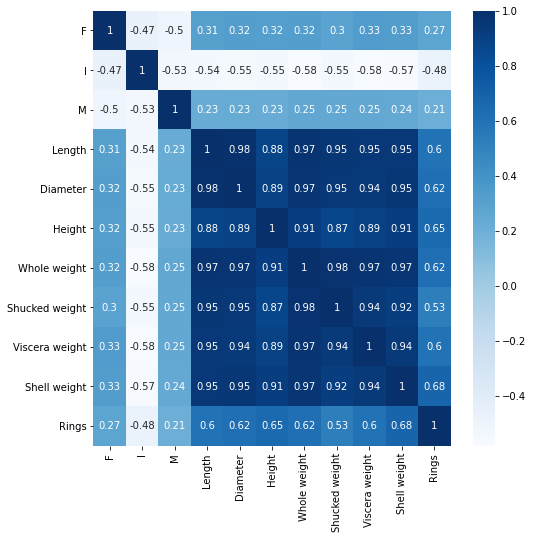

In [57]:
plt.figure(figsize = (8, 8))
sns.heatmap(x.corr(), annot = True, cmap = 'Blues')  # for reference only and this heatmap already explained above

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(data):    # function to check vif
    vif = pd.DataFrame()
    vif['Feature Name'] = x.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range (data.shape[1])]
    return (vif)   

In [59]:
cal_vif(x) 

,Feature Name,VIF
0,F,inf
1,I,inf
2,M,inf
3,Length,34.959510
4,Diameter,33.683279
5,Height,6.675784
6,Whole weight,139.076022
7,Shucked weight,39.603097
8,Viscera weight,22.254214
9,Shell weight,30.639818


In [60]:
# Whole Weight is showing highest VIF therefore we need to delete whole weight columns

In [61]:
x.drop(columns = ['Whole weight'], axis = 1, inplace = True)  # density columns removed from the x data

In [62]:
cal_vif(x) 

,Feature Name,VIF
0,F,inf
1,I,inf
2,M,inf
3,Length,34.878906
4,Diameter,33.668141
5,Height,6.670041
6,Shucked weight,14.881956
7,Viscera weight,14.721700
8,Shell weight,17.182785
9,Rings,2.198405


In [63]:
# Length and diameter is also showing high VIF but we can not delete all columns therefore we will leave as it is

## Standard Scaler

In [64]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [65]:
x_scaler = ss.fit_transform(x)
x = pd.DataFrame(x_scaler, columns = x.columns)

In [66]:
x.head(4)

,F,I,M,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.670525,-0.699088,1.328833,-0.684451,-0.543379,-1.158933,-0.540865,-0.688032,-0.586354,1.673028
1,-0.670525,-0.699088,1.328833,-1.411739,-1.401132,-1.280406,-1.311318,-1.332854,-1.332717,-0.978127
2,1.491368,-0.699088,-0.752540,-0.046219,0.037163,-0.128305,-0.362705,-0.240373,-0.080214,-0.159439
3,-0.670525,-0.699088,1.328833,-0.799651,-0.543379,-0.395963,-0.592261,-0.539936,-0.542533,0.200092


## ML Model

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### Model 1: LinearRegression

In [68]:
for i in range(0, 200 ) :
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model1 = LinearRegression()
    model1.fit(x_train, y_train)
    model1_predict_train = model1.predict(x_train)
    model1_predict_test = model1.predict(x_test)
    
    print('At random state', i, 'the training accuracy is :-', r2_score(model1_predict_train, y_train))
    print('At random state', i, 'the training accuracy is :-', r2_score(model1_predict_test, y_test)) 
    print('\n')

At random state 0 the training accuracy is :- 0.9785915982529276
At random state 0 the training accuracy is :- 0.9776994901296376


At random state 1 the training accuracy is :- 0.9781737525414232
At random state 1 the training accuracy is :- 0.9784260842639011


At random state 2 the training accuracy is :- 0.9781293801323947
At random state 2 the training accuracy is :- 0.9783065879373459


At random state 3 the training accuracy is :- 0.9777533025727799
At random state 3 the training accuracy is :- 0.9791143190235112


At random state 4 the training accuracy is :- 0.9782197719919087
At random state 4 the training accuracy is :- 0.9788337381904929


At random state 5 the training accuracy is :- 0.9781425290863567
At random state 5 the training accuracy is :- 0.978112364137201


At random state 6 the training accuracy is :- 0.9775664076479896
At random state 6 the training accuracy is :- 0.9798884108567087


At random state 7 the training accuracy is :- 0.9780775482720618
At random st

At random state 71 the training accuracy is :- 0.9778645722440039
At random state 71 the training accuracy is :- 0.9791198498797653


At random state 72 the training accuracy is :- 0.9791923382977118
At random state 72 the training accuracy is :- 0.9764635799801862


At random state 73 the training accuracy is :- 0.9791747163524878
At random state 73 the training accuracy is :- 0.9757107973216286


At random state 74 the training accuracy is :- 0.9793817257061129
At random state 74 the training accuracy is :- 0.9759051878044798


At random state 75 the training accuracy is :- 0.9783084545861825
At random state 75 the training accuracy is :- 0.977838544607208


At random state 76 the training accuracy is :- 0.978595070641805
At random state 76 the training accuracy is :- 0.9777043655986114


At random state 77 the training accuracy is :- 0.9779135069185341
At random state 77 the training accuracy is :- 0.9793917355984834


At random state 78 the training accuracy is :- 0.976877436301664

At random state 140 the training accuracy is :- 0.9778368683708049
At random state 140 the training accuracy is :- 0.9789420254327699


At random state 141 the training accuracy is :- 0.9779681583601916
At random state 141 the training accuracy is :- 0.9788561435380358


At random state 142 the training accuracy is :- 0.9787784740939599
At random state 142 the training accuracy is :- 0.9768883531904311


At random state 143 the training accuracy is :- 0.9782436550561697
At random state 143 the training accuracy is :- 0.9783918131238286


At random state 144 the training accuracy is :- 0.9789908280264251
At random state 144 the training accuracy is :- 0.9761678597840919


At random state 145 the training accuracy is :- 0.9785864362598875
At random state 145 the training accuracy is :- 0.9781095104953046


At random state 146 the training accuracy is :- 0.978811893934369
At random state 146 the training accuracy is :- 0.9772480490398024


At random state 147 the training accuracy is :- 0

In [69]:
max_acc1 = 0
random_s1 = 0

for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model1 = LinearRegression()
    model1.fit(x_train, y_train)
    model1_predict = model1.predict(x_test)
    acc = r2_score(model1_predict, y_test)
    
    if acc > max_acc1:
        max_acc1 = acc
        random_s1 = i
print('Model is giving best accurancy', max_acc1, 'on random state of', random_s1 )

Model is giving best accurancy 0.9825180755010302 on random state of 78


In [70]:
# At given randome state where model is giving highest accuracy, that is acutally a under fitting model
# where accuracy of testing >  accuracy of training 

In [71]:
best_fit_linear = 49  # at this random state accuracy of training and testing data is almost same
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = best_fit_linear)
linear_r = LinearRegression()
linear_r.fit(x_train, y_train)
lr_pred = linear_r.predict(x_test)
lr_pred_train = linear_r.predict(x_train)

Train_accuracy1 = r2_score(lr_pred_train, y_train)
Test_accuracy1 = r2_score(lr_pred, y_test)
print('Training accuracy: ', Train_accuracy1)
print('Testing accuracy: ', Test_accuracy1)
print('______________________________________________')
print('Mean squared error: ', mean_squared_error(lr_pred, y_test) )
print('Mean absolute error: ', mean_absolute_error(lr_pred, y_test) )

Training accuracy:  0.9784142961413252
Testing accuracy:  0.9783182524304899
______________________________________________
Mean squared error:  0.17127085711954992
Mean absolute error:  0.2835797352812018


### Cross validation for LinearRegression

In [72]:
for value in range (2, 8):
    cv = cross_val_score(linear_r, x, y, cv = i).mean()
    print('cv score is', cv, 'at cross fold value', value, 'with training accurancy of ', Train_accuracy1, 'and testing accuracy of ',Test_accuracy1 )
    

cv score is 0.9547255286250599 at cross fold value 2 with training accurancy of  0.9784142961413252 and testing accuracy of  0.9783182524304899
cv score is 0.9547255286250599 at cross fold value 3 with training accurancy of  0.9784142961413252 and testing accuracy of  0.9783182524304899
cv score is 0.9547255286250599 at cross fold value 4 with training accurancy of  0.9784142961413252 and testing accuracy of  0.9783182524304899
cv score is 0.9547255286250599 at cross fold value 5 with training accurancy of  0.9784142961413252 and testing accuracy of  0.9783182524304899
cv score is 0.9547255286250599 at cross fold value 6 with training accurancy of  0.9784142961413252 and testing accuracy of  0.9783182524304899
cv score is 0.9547255286250599 at cross fold value 7 with training accurancy of  0.9784142961413252 and testing accuracy of  0.9783182524304899


In [74]:
# as we can see cv is same for every cross fold value 
# so we select any cross fold of them
# system is giving 97.8 percent accuracy 
# and litter difference is present between testing and training data accuracy

### Model 2:  SVR

In [75]:
from sklearn.svm import SVR

In [76]:
for i in range(0, 200 ) :
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model2 = SVR()
    model2.fit(x_train, y_train)
    model2_predict_train = model2.predict(x_train)
    model2_predict_test = model2.predict(x_test)
    
    print('At random state', i, 'the training accuracy is :-', r2_score(model2_predict_train, y_train))
    print('At random state', i, 'the training accuracy is :-', r2_score(model2_predict_test, y_test)) 
    print('\n')

At random state 0 the training accuracy is :- 0.9967832779913832
At random state 0 the training accuracy is :- 0.9951781389000365


At random state 1 the training accuracy is :- 0.9967427658267849
At random state 1 the training accuracy is :- 0.9966587953615317


At random state 2 the training accuracy is :- 0.9966497136073365
At random state 2 the training accuracy is :- 0.9956184985981379


At random state 3 the training accuracy is :- 0.9966282677726341
At random state 3 the training accuracy is :- 0.9972546092358562


At random state 4 the training accuracy is :- 0.996616504123051
At random state 4 the training accuracy is :- 0.9973876024625344


At random state 5 the training accuracy is :- 0.9964787708752654
At random state 5 the training accuracy is :- 0.9968110503076546


At random state 6 the training accuracy is :- 0.9967322244442037
At random state 6 the training accuracy is :- 0.9956807777554652


At random state 7 the training accuracy is :- 0.9971524837898265
At random st

At random state 62 the training accuracy is :- 0.9964687445134647
At random state 62 the training accuracy is :- 0.9970756579243739


At random state 63 the training accuracy is :- 0.9965702252418254
At random state 63 the training accuracy is :- 0.9972435002763899


At random state 64 the training accuracy is :- 0.9963399443977722
At random state 64 the training accuracy is :- 0.9961047134151853


At random state 65 the training accuracy is :- 0.996479286614048
At random state 65 the training accuracy is :- 0.9958465999835375


At random state 66 the training accuracy is :- 0.9966134638673158
At random state 66 the training accuracy is :- 0.9964324155986857


At random state 67 the training accuracy is :- 0.9968100581146278
At random state 67 the training accuracy is :- 0.9957895200044735


At random state 68 the training accuracy is :- 0.9968756054133202
At random state 68 the training accuracy is :- 0.9957772462094839


At random state 69 the training accuracy is :- 0.99640354858176

At random state 123 the training accuracy is :- 0.9968404066069176
At random state 123 the training accuracy is :- 0.9956643794241793


At random state 124 the training accuracy is :- 0.9968346642366793
At random state 124 the training accuracy is :- 0.9943066287501245


At random state 125 the training accuracy is :- 0.9966170719956317
At random state 125 the training accuracy is :- 0.9970568496594455


At random state 126 the training accuracy is :- 0.996773128188039
At random state 126 the training accuracy is :- 0.9955692869785627


At random state 127 the training accuracy is :- 0.9965897960817472
At random state 127 the training accuracy is :- 0.9956288332178227


At random state 128 the training accuracy is :- 0.9968605869934613
At random state 128 the training accuracy is :- 0.9960874186267504


At random state 129 the training accuracy is :- 0.9966465154262559
At random state 129 the training accuracy is :- 0.9956917504541543


At random state 130 the training accuracy is :- 0

At random state 184 the training accuracy is :- 0.9969473011703863
At random state 184 the training accuracy is :- 0.9949880888021078


At random state 185 the training accuracy is :- 0.996809166048623
At random state 185 the training accuracy is :- 0.9954554861712176


At random state 186 the training accuracy is :- 0.9964640207378289
At random state 186 the training accuracy is :- 0.9964491402269113


At random state 187 the training accuracy is :- 0.9966056087663283
At random state 187 the training accuracy is :- 0.996009670882294


At random state 188 the training accuracy is :- 0.9969442511090691
At random state 188 the training accuracy is :- 0.9951323296219198


At random state 189 the training accuracy is :- 0.9963781247332161
At random state 189 the training accuracy is :- 0.9969248143661412


At random state 190 the training accuracy is :- 0.9966294856677661
At random state 190 the training accuracy is :- 0.9959351360156559


At random state 191 the training accuracy is :- 0.

In [77]:
max_acc2 = 0
random_s2 = 0

for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model2 = SVR()
    model2.fit(x_train, y_train)
    model2_predict = model2.predict(x_test)
    acc = r2_score(model2_predict, y_test)
    
    if acc > max_acc2:
        max_acc2 = acc
        random_s2 = i
print('Model is giving best accurancy', max_acc2, 'on random state of', random_s2 )

Model is giving best accurancy 0.9978336473150913 on random state of 165


In [78]:
# at above metioned randome state that is giving under fitted model where accuracy of testing is greater 
# than accuracy of training

radom_best_fit2 = 12  # We need to change it with again compilation 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = radom_best_fit2)
svr = SVR()
svr.fit(x_train, y_train)
svr_pred = svr.predict(x_test)
svr_pred_train = svr.predict(x_train)

Train_accuracy2 = r2_score(svr_pred_train, y_train)
Test_accuracy2 = r2_score(svr_pred, y_test)
print('Training accuracy: ', Train_accuracy2)
print('Testing accuracy: ', Test_accuracy2)
print('______________________________________________')
print('Mean squared error: ', mean_squared_error(svr_pred, y_test) )
print('Mean absolute error: ', mean_absolute_error(svr_pred, y_test) )

Training accuracy:  0.9965769329140002
Testing accuracy:  0.9965641455105912
______________________________________________
Mean squared error:  0.0273710092255886
Mean absolute error:  0.08428074798949454


## Cross Validation for SVR

In [79]:
for value in range (2, 8):
    cv = cross_val_score(svr, x, y, cv = i).mean()
    print('cv score is', cv, 'at cross fold value', value, 'with training accurancy of ', Train_accuracy2, 'and testing accuracy of ',Test_accuracy2 )
    

cv score is 0.9945987499139045 at cross fold value 2 with training accurancy of  0.9965769329140002 and testing accuracy of  0.9965641455105912
cv score is 0.9945987499139045 at cross fold value 3 with training accurancy of  0.9965769329140002 and testing accuracy of  0.9965641455105912
cv score is 0.9945987499139045 at cross fold value 4 with training accurancy of  0.9965769329140002 and testing accuracy of  0.9965641455105912
cv score is 0.9945987499139045 at cross fold value 5 with training accurancy of  0.9965769329140002 and testing accuracy of  0.9965641455105912
cv score is 0.9945987499139045 at cross fold value 6 with training accurancy of  0.9965769329140002 and testing accuracy of  0.9965641455105912
cv score is 0.9945987499139045 at cross fold value 7 with training accurancy of  0.9965769329140002 and testing accuracy of  0.9965641455105912


### Model 3:  DecisionTreeRegressor

In [80]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
for i in range(0, 200 ) :
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model3 = DecisionTreeRegressor()
    model3.fit(x_train, y_train)
    model3_predict_train = model3.predict(x_train)
    model3_predict_test = model3.predict(x_test)
    
    print('At random state', i, 'the training accuracy is :-', r2_score(model3_predict_train, y_train))
    print('At random state', i, 'the training accuracy is :-', r2_score(model3_predict_test, y_test)) 
    print('\n')

At random state 0 the training accuracy is :- 1.0
At random state 0 the training accuracy is :- 1.0


At random state 1 the training accuracy is :- 1.0
At random state 1 the training accuracy is :- 1.0


At random state 2 the training accuracy is :- 1.0
At random state 2 the training accuracy is :- 1.0


At random state 3 the training accuracy is :- 1.0
At random state 3 the training accuracy is :- 1.0


At random state 4 the training accuracy is :- 1.0
At random state 4 the training accuracy is :- 1.0


At random state 5 the training accuracy is :- 1.0
At random state 5 the training accuracy is :- 1.0


At random state 6 the training accuracy is :- 1.0
At random state 6 the training accuracy is :- 1.0


At random state 7 the training accuracy is :- 1.0
At random state 7 the training accuracy is :- 1.0


At random state 8 the training accuracy is :- 1.0
At random state 8 the training accuracy is :- 1.0


At random state 9 the training accuracy is :- 1.0
At random state 9 the training a

At random state 79 the training accuracy is :- 1.0
At random state 79 the training accuracy is :- 1.0


At random state 80 the training accuracy is :- 1.0
At random state 80 the training accuracy is :- 1.0


At random state 81 the training accuracy is :- 1.0
At random state 81 the training accuracy is :- 1.0


At random state 82 the training accuracy is :- 1.0
At random state 82 the training accuracy is :- 1.0


At random state 83 the training accuracy is :- 1.0
At random state 83 the training accuracy is :- 1.0


At random state 84 the training accuracy is :- 1.0
At random state 84 the training accuracy is :- 1.0


At random state 85 the training accuracy is :- 1.0
At random state 85 the training accuracy is :- 1.0


At random state 86 the training accuracy is :- 1.0
At random state 86 the training accuracy is :- 1.0


At random state 87 the training accuracy is :- 1.0
At random state 87 the training accuracy is :- 1.0


At random state 88 the training accuracy is :- 1.0
At random sta

At random state 165 the training accuracy is :- 1.0
At random state 165 the training accuracy is :- 1.0


At random state 166 the training accuracy is :- 1.0
At random state 166 the training accuracy is :- 1.0


At random state 167 the training accuracy is :- 1.0
At random state 167 the training accuracy is :- 1.0


At random state 168 the training accuracy is :- 1.0
At random state 168 the training accuracy is :- 1.0


At random state 169 the training accuracy is :- 1.0
At random state 169 the training accuracy is :- 1.0


At random state 170 the training accuracy is :- 1.0
At random state 170 the training accuracy is :- 1.0


At random state 171 the training accuracy is :- 1.0
At random state 171 the training accuracy is :- 1.0


At random state 172 the training accuracy is :- 1.0
At random state 172 the training accuracy is :- 1.0


At random state 173 the training accuracy is :- 1.0
At random state 173 the training accuracy is :- 1.0


At random state 174 the training accuracy is :

In [82]:
max_acc3 = 0
random_s3 = 0

for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model3 = DecisionTreeRegressor()
    model3.fit(x_train, y_train)
    model3_predict = model3.predict(x_test)
    acc = r2_score(model3_predict, y_test)
    
    if acc > max_acc3:
        max_acc3 = acc
        random_s3 = i
print('Model is giving best accurancy', max_acc3, 'on random state of', random_s3 )

Model is giving best accurancy 1.0 on random state of 0


In [83]:
# DecessionTreeRegressor is giving 100 % accuracy at every random state 
# This algorithm is working extremly fine
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
dtr_pred = dtr.predict(x_test)
dtr_pred_train = dtr.predict(x_train)

Train_accuracy3 = r2_score(dtr_pred_train, y_train)
Test_accuracy3 = r2_score(dtr_pred, y_test)
print('Training accuracy: ', Train_accuracy3)
print('Testing accuracy: ', Test_accuracy3)
print('______________________________________________')
print('Mean squared error: ', mean_squared_error(dtr_pred, y_test) )
print('Mean absolute error: ', mean_absolute_error(dtr_pred, y_test) )

Training accuracy:  1.0
Testing accuracy:  1.0
______________________________________________
Mean squared error:  0.0
Mean absolute error:  0.0


In [84]:
# Cross Validation for DecisionTreeRegressor

In [85]:
for value in range (2, 8):
    cv = cross_val_score(dtr, x, y, cv = i).mean()
    print('cv score is', cv, 'at cross fold value', value, 'with training accurancy of ', Train_accuracy3, 'and testing accuracy of ',Test_accuracy3 )
    

cv score is 1.0 at cross fold value 2 with training accurancy of  1.0 and testing accuracy of  1.0
cv score is 1.0 at cross fold value 3 with training accurancy of  1.0 and testing accuracy of  1.0
cv score is 1.0 at cross fold value 4 with training accurancy of  1.0 and testing accuracy of  1.0
cv score is 1.0 at cross fold value 5 with training accurancy of  1.0 and testing accuracy of  1.0
cv score is 1.0 at cross fold value 6 with training accurancy of  1.0 and testing accuracy of  1.0
cv score is 1.0 at cross fold value 7 with training accurancy of  1.0 and testing accuracy of  1.0


In [86]:
# As we can observed cv is giving same value at every cross fold value

### Model 4 : RandomFOrestRegressor 

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
for i in range(0, 200 ) :
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model4 = RandomForestRegressor()
    model4.fit(x_train, y_train)
    model4_predict_train = model4.predict(x_train)
    model4_predict_test = model4.predict(x_test)
    
    print('At random state', i, 'the training accuracy is :-', r2_score(model4_predict_train, y_train))
    print('At random state', i, 'the training accuracy is :-', r2_score(model4_predict_test, y_test)) 
    print('\n')

At random state 0 the training accuracy is :- 1.0
At random state 0 the training accuracy is :- 1.0


At random state 1 the training accuracy is :- 0.9999993894171162
At random state 1 the training accuracy is :- 0.9999984937467952


At random state 2 the training accuracy is :- 0.999999969273336
At random state 2 the training accuracy is :- 0.9999999707364154


At random state 3 the training accuracy is :- 0.9999999658961202
At random state 3 the training accuracy is :- 0.9999999686683035


At random state 4 the training accuracy is :- 0.9999999327425684
At random state 4 the training accuracy is :- 0.9999998269075824


At random state 5 the training accuracy is :- 0.999999965685338
At random state 5 the training accuracy is :- 0.9999999794337666


At random state 6 the training accuracy is :- 0.9999999692902802
At random state 6 the training accuracy is :- 0.9999999804368078


At random state 7 the training accuracy is :- 0.9999999161398065
At random state 7 the training accuracy is 

At random state 70 the training accuracy is :- 0.9999994044308068
At random state 70 the training accuracy is :- 0.9999976734706011


At random state 71 the training accuracy is :- 1.0
At random state 71 the training accuracy is :- 1.0


At random state 72 the training accuracy is :- 0.9999985736263773
At random state 72 the training accuracy is :- 0.9999922912424919


At random state 73 the training accuracy is :- 0.9999999823320153
At random state 73 the training accuracy is :- 0.9999999614928253


At random state 74 the training accuracy is :- 0.9999998510454795
At random state 74 the training accuracy is :- 0.9999995004987593


At random state 75 the training accuracy is :- 0.9999999737055566
At random state 75 the training accuracy is :- 0.9999999803799576


At random state 76 the training accuracy is :- 0.9999999739734329
At random state 76 the training accuracy is :- 0.999999959916365


At random state 77 the training accuracy is :- 0.999999884646767
At random state 77 the train

At random state 139 the training accuracy is :- 0.9999990930226479
At random state 139 the training accuracy is :- 0.9999955025384637


At random state 140 the training accuracy is :- 1.0
At random state 140 the training accuracy is :- 1.0


At random state 141 the training accuracy is :- 1.0
At random state 141 the training accuracy is :- 1.0


At random state 142 the training accuracy is :- 0.9999999694500997
At random state 142 the training accuracy is :- 0.9999999802378678


At random state 143 the training accuracy is :- 0.99999997432564
At random state 143 the training accuracy is :- 0.9999999586119181


At random state 144 the training accuracy is :- 1.0
At random state 144 the training accuracy is :- 1.0


At random state 145 the training accuracy is :- 1.0
At random state 145 the training accuracy is :- 1.0


At random state 146 the training accuracy is :- 1.0
At random state 146 the training accuracy is :- 1.0


At random state 147 the training accuracy is :- 0.99999997845103

In [89]:
# This randomforest algo is also giving 100 % percentage accuracy of training and testing 
# but fail to give 100 % accuracy at some randome state
best_fit4 = 8
max_acc4 = 0
random_s4 = 0

for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model4 = RandomForestRegressor()
    model4.fit(x_train, y_train)
    model4_predict = model4.predict(x_test)
    acc = r2_score(model4_predict, y_test)
    
    if acc > max_acc4:
        max_acc4 = acc
        random_s4 = i
print('Model is giving best accurancy', max_acc4, 'on random state of', random_s4 )

Model is giving best accurancy 1.0 on random state of 0


In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = random_s4)
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)
rfr_pred_train = rfr.predict(x_train)

Train_accuracy4 = r2_score(rfr_pred_train, y_train)
Test_accuracy4 = r2_score(rfr_pred, y_test)
print('Training accuracy: ', Train_accuracy4)
print('Testing accuracy: ', Test_accuracy4)
print('______________________________________________')
print('Mean squared error: ', mean_squared_error(rfr_pred, y_test) )
print('Mean absolute error: ', mean_absolute_error(rfr_pred, y_test) )

Training accuracy:  1.0
Testing accuracy:  1.0
______________________________________________
Mean squared error:  0.0
Mean absolute error:  0.0


## Cross Validation for RandomForestRegressor

In [92]:
for value in range (2, 8):
    cv = cross_val_score(rfr, x, y, cv = i).mean()
    print('cv score is', cv, 'at cross fold value', value, 'with training accurancy of ', Train_accuracy4, 'and testing accuracy of ',Test_accuracy4 )
    

cv score is 1.0 at cross fold value 2 with training accurancy of  1.0 and testing accuracy of  1.0
cv score is 1.0 at cross fold value 3 with training accurancy of  1.0 and testing accuracy of  1.0
cv score is 0.9999999982802444 at cross fold value 4 with training accurancy of  1.0 and testing accuracy of  1.0
cv score is 0.9999999876075817 at cross fold value 5 with training accurancy of  1.0 and testing accuracy of  1.0
cv score is 0.9999999964246705 at cross fold value 6 with training accurancy of  1.0 and testing accuracy of  1.0
cv score is 0.999999994225341 at cross fold value 7 with training accurancy of  1.0 and testing accuracy of  1.0


In [93]:
# we can observed DecesionTreeRegressor is performing best or extremly best
# Accuracy of training and testing is equal hence, not over fitting or under fitting is occuring
# aslo taking less time to execute
# also differene between cross and accuracy is zero
# giving 100 accuracy at every random state
# Executing module with 0 mean_Squred error

In [94]:
#                                 r2_score             	cross_val_score             	Difference
# LinearRegression             	0.982518076          	0.974720049                 	0.007798027
# SVR                          	0.997833647          	0.995756563                 	0.002077084
# DecisionTreeRegressor        	1                    	1                           	0
# RandomForestRegression       	1                    	0.999999986                 	1.38493E-08

# As we can observe DecisionTreRegressor is showing 0 difference between r2_score and cross_val_score
# therefore, we will consider decisiontree as final model 

## Final Model (DecisionTreeRegressor)

### Ensemble Techniques

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
parameter = { 'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'splitter': ['best', 'random'], 
            'max_depth' : [2, 3, 4, 5, 6, 7, 8, ], 'max_features': ['auto', 'sqrt', 'log2'] }

In [98]:
gcv = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid =  parameter, cv = 5)
gcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [99]:
gcv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [100]:
final_model = DecisionTreeRegressor(criterion = 'friedman_mse',max_depth = 5, max_features = 'auto', splitter = 'best' )
final_model.fit(x_train, y_train)
final_pred = final_model.predict(x_test)
final_pred_train = final_model.predict(x_train)

final_train_accuracy = r2_score(final_pred_train, y_train)
final_test_accuracy = r2_score(final_pred, y_test)
print('Training accuracy: ', final_train_accuracy)
print('Testing accuracy: ', final_test_accuracy)
print('______________________________________________')
print('Mean squared error: ', mean_squared_error(final_pred, y_test) )
print('Mean absolute error: ', mean_absolute_error(final_pred, y_test) )

Training accuracy:  1.0
Testing accuracy:  1.0
______________________________________________
Mean squared error:  0.0
Mean absolute error:  0.0


## Cross_Val_score

In [101]:
for value in range (2, 8):
    cv = cross_val_score(final_model, x, y, cv = i).mean()
    print('cv score is', cv, 'at cross fold value', value, 'with training accurancy of ', final_train_accuracy, 'and testing accuracy of ',final_test_accuracy )
    

cv score is 1.0 at cross fold value 2 with training accurancy of  1.0 and testing accuracy of  1.0
cv score is 1.0 at cross fold value 3 with training accurancy of  1.0 and testing accuracy of  1.0
cv score is 1.0 at cross fold value 4 with training accurancy of  1.0 and testing accuracy of  1.0
cv score is 1.0 at cross fold value 5 with training accurancy of  1.0 and testing accuracy of  1.0
cv score is 1.0 at cross fold value 6 with training accurancy of  1.0 and testing accuracy of  1.0
cv score is 1.0 at cross fold value 7 with training accurancy of  1.0 and testing accuracy of  1.0


In [102]:
#  Since the number of folds don't have any impact on the accuracy and CV score, So we can select any 
# of them
# Here we have handled the problem of the overfitting and the underfitting by checking accuracy of training
# and testing data

## Graph

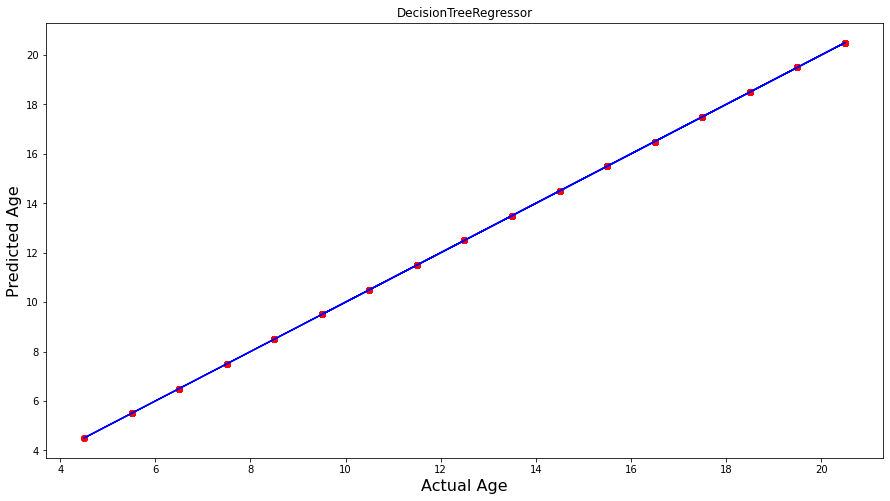

In [103]:
plt.figure(figsize = (15, 8))
plt.scatter(x = y_test, y  = final_pred, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual Age', fontsize = 16)
plt.ylabel('Predicted Age', fontsize = 16)
plt.title('DecisionTreeRegressor')
plt.show()

In [104]:
# We are getting accuracy of 100 and error of 0 %

# Deploy model

In [105]:
import pickle
filename = 'abalone_age.pkl'
pickle.dump(final_model, open(filename, 'wb'))

## Loading model

In [106]:
load_model =  pickle.load(open('abalone_age.pkl', 'rb'))
result = load_model.score(x_test, y_test)
print(result)

1.0


## Conclusion

In [107]:
conclusion = pd.DataFrame()
predicted_age = np.array(load_model.predict(x_test))
original_age = np.array(y_test)
# convert columns in to np.array 

In [108]:
print(predicted_age.shape)
print(original_age.shape)
print(x_test.shape)
print(y_test.shape)

(1209,)
(1209,)
(1209, 10)
(1209,)


In [109]:
conclusion = pd.DataFrame({'Original value': original_age, 'predicted': predicted_age}, index = range(len(original_age)))

## Conclusion DataFrame

In [111]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
conclusion

,Original value,predicted
0,9.5,9.5
1,10.5,10.5
2,7.5,7.5
3,9.5,9.5
4,13.5,13.5
5,10.5,10.5
6,12.5,12.5
7,9.5,9.5
8,9.5,9.5
9,9.5,9.5
